In [2]:
import pandas as pd
import numpy as np
data = pd.read_csv('data.csv')

In [3]:
data.replace('?', np.nan, inplace= True)
data = data.astype({"age": np.float64, "fare": np.float64})

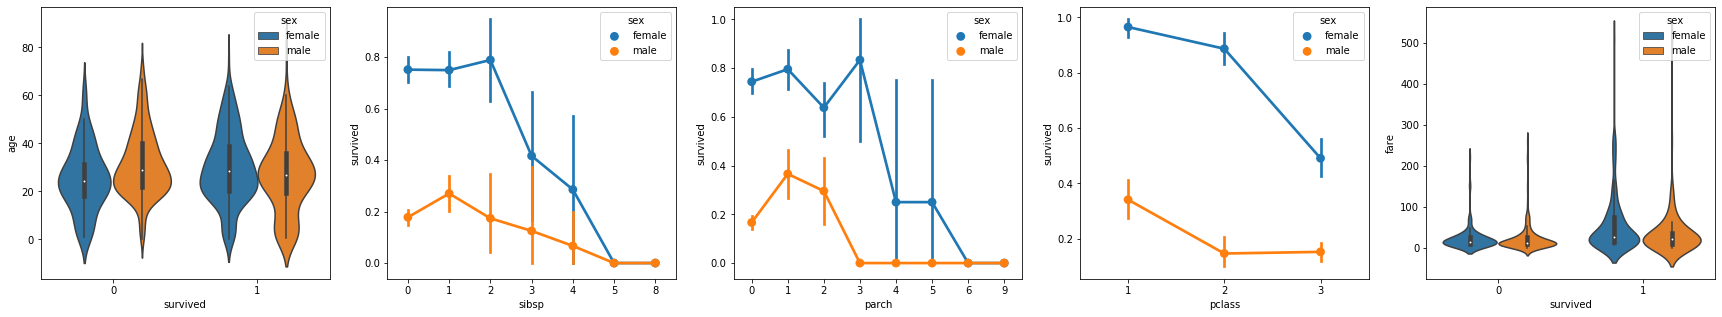

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x="survived", y="age", hue="sex", data=data, ax=axs[0])
sns.pointplot(x="sibsp", y="survived", hue="sex", data=data, ax=axs[1])
sns.pointplot(x="parch", y="survived", hue="sex", data=data, ax=axs[2])
sns.pointplot(x="pclass", y="survived", hue="sex", data=data, ax=axs[3])
sns.violinplot(x="survived", y="fare", hue="sex", data=data, ax=axs[4])

In [6]:
data.replace({'male': 1, 'female': 0}, inplace=True)

In [7]:
data.corr().abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055513
sibsp,0.027825
parch,0.082660
fare,0.244265


In [8]:
data['relatives'] = data.apply (lambda row: int((row['sibsp'] + row['parch']) > 0), axis=1)
data.corr().abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055513
sibsp,0.027825
parch,0.082660
fare,0.244265
relatives,0.201719


In [9]:
data = data[['sex', 'pclass','age','relatives','fare','survived']].dropna()

In [10]:
from sklearn.model_selection import train_test_split
#划分训练测试集
x_train, x_test, y_train, y_test = train_test_split(data[['sex','pclass','age','relatives','fare']], data.survived, test_size=0.2, random_state=0)

In [11]:
#正则化
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [12]:
#Naïve Bayes algorithm,
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB(priors=None)

In [13]:
from sklearn import metrics
predict_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, predict_test))

0.7464114832535885


In [14]:
#Use a neural network to increase accuracy#
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()#a layered neural network wherein there are multiple layers that feed into each other in sequence.

Using TensorFlow backend.



In [15]:
#a dimension of 5, since you have 5 inputs: sex, pclass, age, relatives, and fare
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu', input_dim = 5))
# 5 for simplicity, although that value could have been different.
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu'))
#a 1-dimensional output indicating whether a passenger would survive.
model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 66
Trainable params: 66
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=50)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/50
836/836 [==============================] - 0s 587us/step - loss: 0.6921 - acc: 0.5921
Epoch 2/50
836/836 [==============================] - 0s 117us/step - loss: 0.6894 - acc: 0.5861
Epoch 3/50
836/836 [==============================] - 0s 146us/step - loss: 0.6847 - acc: 0.5861
Epoch 4/50
836/836 [==============================] - 0s 116us/step - loss: 0.6756 - acc: 0.5861
Epoch 5/50
836/836 [==============================] - 0s 90us/step - loss: 0.6609 - acc: 0.5933
Epoch 6/50
836/836 [==============================] - 0s 86us/step - loss: 0.6403 - acc: 0.6950
Epoch 7/50
836/836 [==============================] - 0s 136us/step - loss: 0.6157 - acc: 0.7560
Epoch 8/50
836/836 [==============================] - 0s 145us/step - loss: 0.5899 - acc: 0.7644
Epoch 9/50
836/836 [==============================] - 0s 99us/step - loss: 0.5672 - acc: 0.7679
Epoch 10/50
836/836 [============

In [18]:
y_pred = model.predict_classes(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.7990430622009569
